In [5]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import time
import sys

from scipy.optimize import minimize
from random import choice

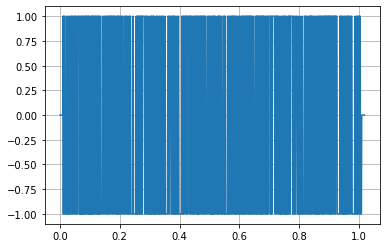

In [6]:
#---------------------------------------------------------------
#signal---------------------------------------------------------
#---------------------------------------------------------------
N = 1000
Ta = 1*10**(-3)

#creating prbs signal
def prbs():
    while True:
        yield choice([False,True])

r = np.zeros(N)
i = 0
for value in prbs():
    r[i] = value
    i = i+1
    if i==N:
        break

r = 2*r-1

r = np.concatenate((np.zeros(10), r, np.zeros(10)))
t = np.linspace(0,(N+20-1)*Ta,N+20)

plt.figure()
plt.plot(t,r)
plt.grid()
plt.show()


G = TransferFunctionDiscrete(
array([ 0.5, -0.4]),
array([ 1. , -1.8,  0.9]),
dt: 0.001
)


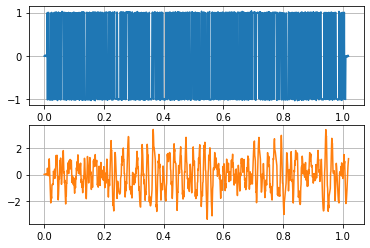

In [7]:
#---------------------------------------------------------------
#plant----------------------------------------------------------
#---------------------------------------------------------------
kg = 2
z1g = 0.8
p1g = 0.9 + 0.3j
p2g = np.conj(p1g)
numG = [1,-z1g]
denG = [1,float(-(p1g+p2g)),float(p1g*p2g)]
evalg = sum(numG)/sum(denG)
numG = np.dot(numG,(1/evalg))
G = ss.TransferFunction(numG,denG,dt=Ta)

print("\nG =",G)

u = r
t,y = ss.dlsim(G,u,t)

nu = 0.1*np.random.normal(0, .1, u.shape)
ny = 0.2*np.random.normal(0, .1, y.shape)

u = u + nu
y = y + ny

fig,axs = plt.subplots(2,1)
axs = axs.reshape(-1)
axs[0].plot(t,u,color='C0')
axs[1].plot(t,y,color='C1')
axs[0].grid()
axs[1].grid()
plt.show()


In [9]:
start_time = time.time()
ir = impulseest(u,y,n=100,RegularizationKernel='DC')
end_time = time.time()
t,G_h = ss.dimpulse(G, n=100)

print("Function took {:.2f} seconds to solve minimization with regularization by the Empirical Bayes approach." .format(end_time-start_time))

plt.plot(np.squeeze(G_h),color='C0')
plt.plot(ir,linestyle='--',color='C1')
plt.legend(['Real IR','Estimated IR'])
plt.grid()
plt.show()

NameError: name 'impulseest' is not defined

In [ ]:
import os
os._exit(00)